<a href="https://colab.research.google.com/github/vlochub/MIT-Xpro-colab/blob/main/MO_PCDSTry_It_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Try-it activity will walk through a clustering model for sample customer data. We will be splitting the customers into groups in order to get greater insight of our customer demographics and spending trends.  

Start by downloading [this](https://mo-pcco.s3.us-east-1.amazonaws.com/MO-PCDS/module4/activity-name-1_starter.zip) data. Once the dataset is downloaded for you locally, execute the code set below and upload the csv file to the Colab Notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.express as pxp
import plotly.graph_objs as gph
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from google.colab import files


uploaded = files.upload()
data = pd.read_csv('4-1Data.csv')
data.head()

Saving 4-1Data.csv to 4-1Data.csv


,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Drop the unused column.

In [ ]:
data.drop('CustomerID', axis=1, inplace=True)

In [ ]:
data.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


We can check the distribution of columns in data to see how data is distributed in various columns.

<ipython-input-4-2663716581>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols])
<ipython-input-4-2663716581>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols])
<ipython-input-4-2663716581>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0

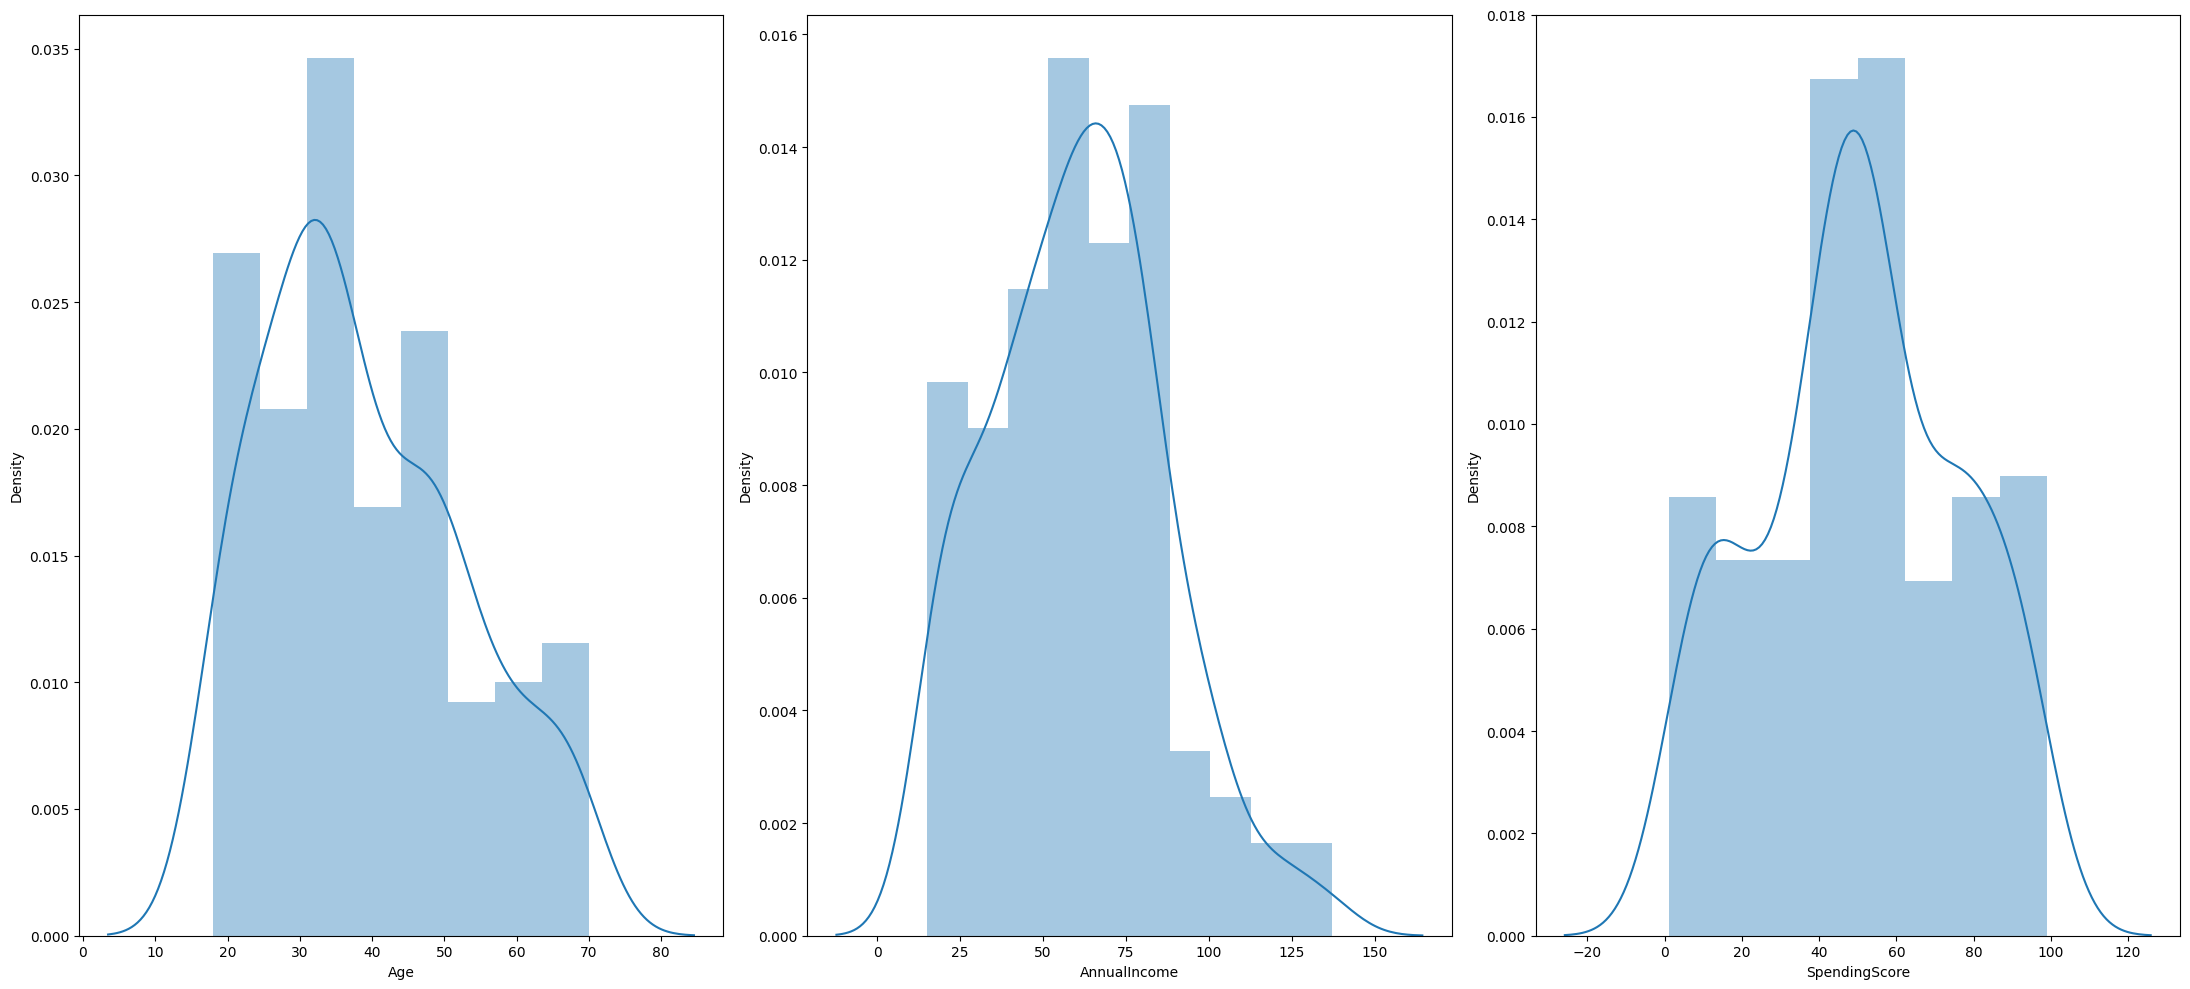

In [ ]:
plot.figure(figsize = (22, 10))
plotnum = 1

for cols in ['Age', 'AnnualIncome', 'SpendingScore']:
    if plotnum <= 3:
        axs = plot.subplot(1, 3, plotnum)
        sns.distplot(data[cols])

    plotnum += 1

plot.tight_layout()
plot.show()

Now let’s create a bar plot to check the distribution of customers in particular age groups. You can also apply the same to visualize the number of customers versus spending scores and the number of customers based on their annual income.

In [ ]:
age_55above = data.Age[data.Age >= 55]
age_46_55 = data.Age[(data.Age >= 46) & (data.Age <= 55)]
age_36_45 = data.Age[(data.Age >= 36) & (data.Age <= 45)]
age_26_35 = data.Age[(data.Age >= 26) & (data.Age <= 35)]
age_18_25 = data.Age[(data.Age >= 18) & (data.Age <= 25)]

In [ ]:
x_age_ax = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age_ax = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

pxp.bar(data_frame = data, x = x_age_ax, y = y_age_ax, color = x_age_ax,
       title = 'Count of customers per age group')

One of the most critical aspects of clustering is selecting the correct value of K. Randomly selecting K might not be a favorable choice. We’ll be using the elbow method and silhouette score to choose the value of K.

In our case, from the below graph, it looks like the optimal value of K found from the elbow method is 4. We want to maximize the number of clusters and limit cases where each data point becomes its cluster centroid.

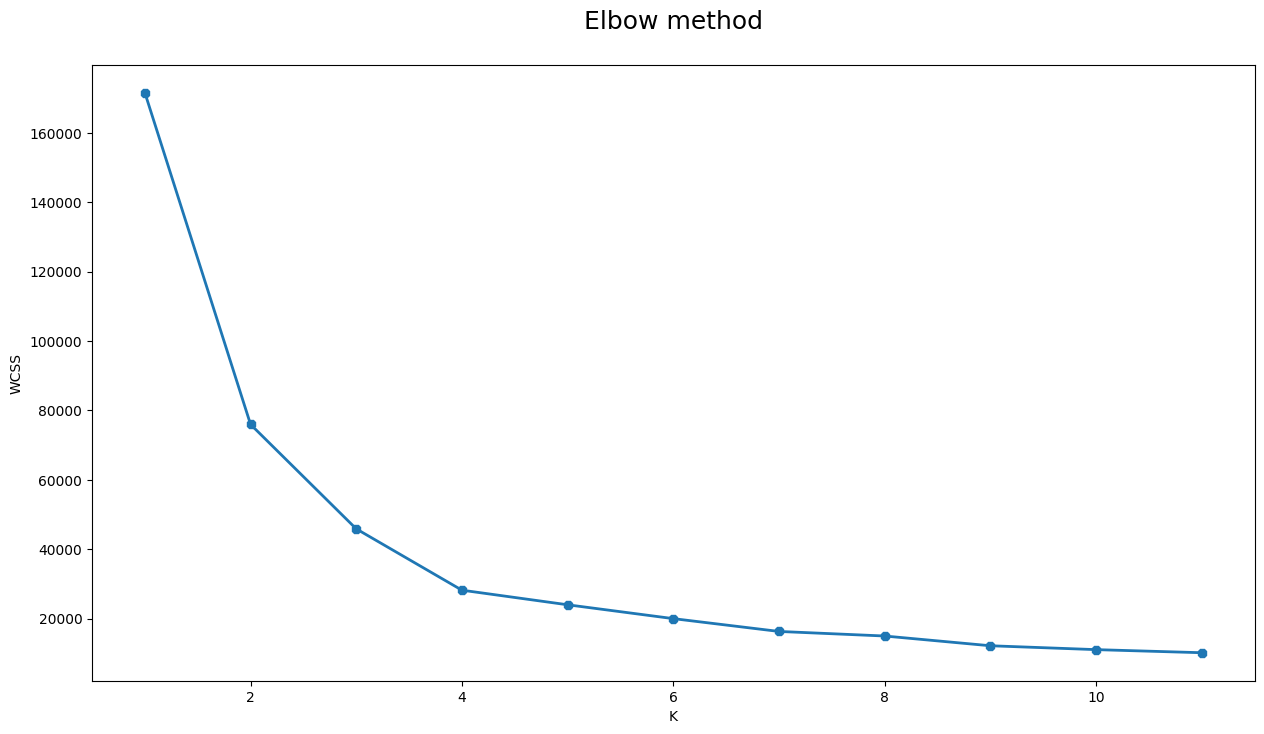

In [ ]:
x_input = data.loc[:, ['Age', 'SpendingScore']].values


wcss = []
for k in range(1, 12):
    k_means = KMeans(n_clusters=k, init='k-means++')
    k_means.fit(x_input)
    wcss.append(k_means.inertia_)

plot.figure(figsize=(15,8))

plot.plot(range(1, 12), wcss, linewidth=2, marker='8')
plot.title('Elbow method\n', fontsize=18)
plot.xlabel('K')
plot.ylabel('WCSS')
plot.show()

In [ ]:
k_means=KMeans(n_clusters=4)
labels=k_means.fit_predict(x_input)
print(k_means.cluster_centers_)

[[30.1754386  82.35087719]
 [55.40816327 48.04081633]
 [43.29166667 15.02083333]
 [27.32608696 49.36956522]]


Now let’s plot a graph to check how the clusters are formed from the data.

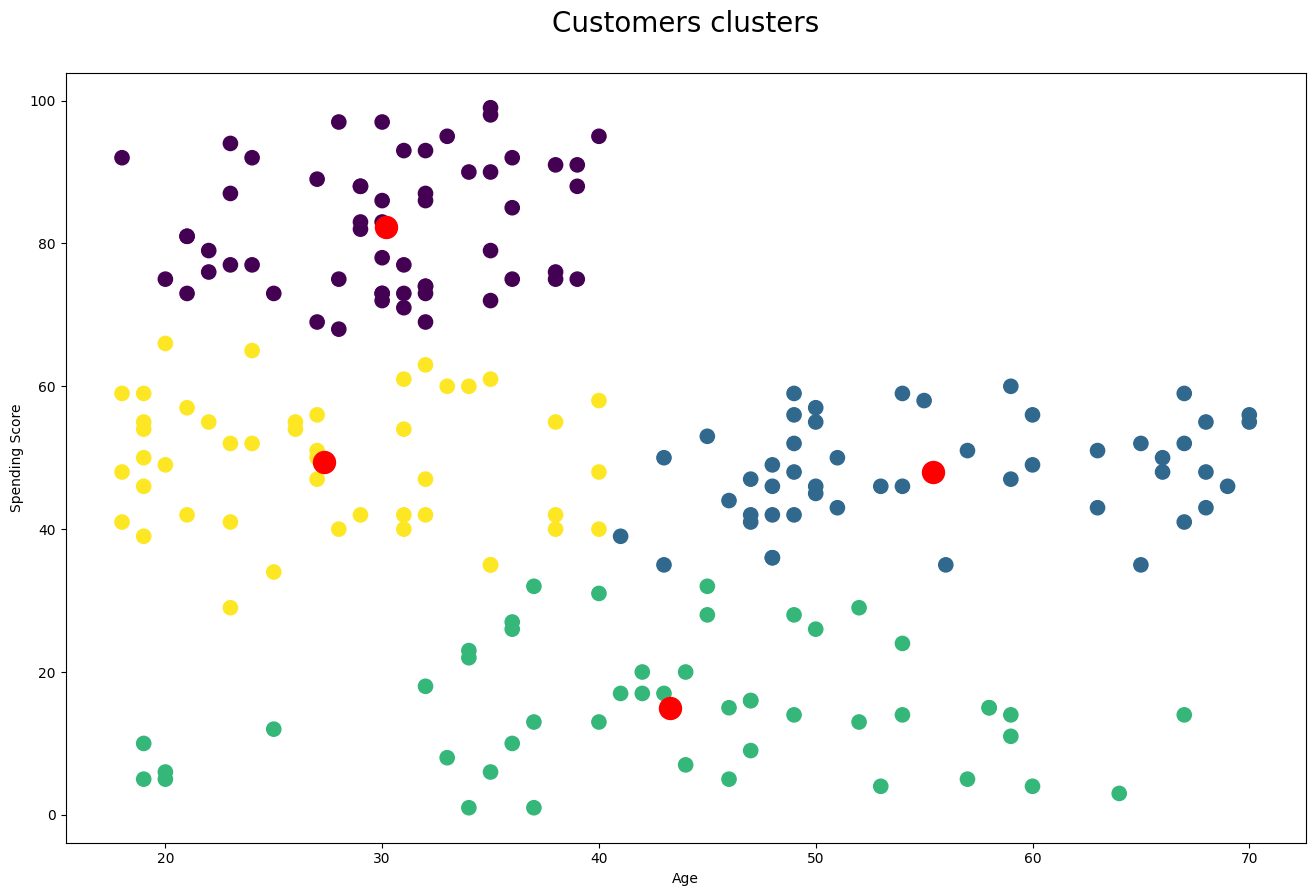

In [ ]:
plot.figure(figsize = (16, 10))
plot.scatter(x_input[:, 0], x_input[:, 1], c =
k_means.labels_, s = 105)
plot.scatter(k_means.cluster_centers_[:, 0],k_means.cluster_centers_[:, 1], color = 'red', s = 250)
plot.title('Customers clusters\n', fontsize = 20)
plot.xlabel('Age')
plot.ylabel('Spending Score')
plot.show()